<a href="https://colab.research.google.com/github/will2bless1140/cpu-sheduling/blob/main/Rain_fall_in_Austraila_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# this is a data set of weather in Austrailia
aus_data = pd.read_csv('weatherAUS.csv')
aus_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
aus_data.shape

(145460, 23)

In [ ]:
# looking at the informationm in the data, the total entry of the data is 145460 with 23 columns. there are so many missing values in sunshine, evaporation, cloud9am, cloud3pm.
aus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# checking for number of null value
aus_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
aus_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# now we will drop those columns with so many missing values
aus_data.drop(aus_data.columns[[5,6,17,18]], axis=1, inplace=True)

In [ ]:
aus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [ ]:
#set the date as the index
aus_data = aus_data.set_index('Date')

In [ ]:
# checking for number of null value
aus_data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
aus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  RainToday      142199 non-null  object 
 17  RainTomorrow   142193

In [ ]:
aus_data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
# now we fill the remaining missing values with the most frequent values which is the mode
for column in aus_data.columns:
    aus_data[column].fillna(aus_data[column].mode()[0], inplace=True)

In [ ]:
aus_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  object 
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  object 
 7   WindDir3pm     145460 non-null  object 
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  object 
 17  RainTomorrow   145460

In [ ]:
# this is to check the category of variables that are object in the dataset
categorical_features = aus_data.dtypes[aus_data.dtypes == 'object'].index
categorical_features

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [ ]:
aus_data[categorical_features].describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,145460,145460,145460,145460
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,20241,22324,15066,113580,113583


In [ ]:
# checking the unique values in them
aus_data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
aus_data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
aus_data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [ ]:
aus_data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [ ]:
aus_data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
aus_data['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
aus_data.shape

(145460, 18)

In [ ]:
#This is to drop duplicates
aus_data=aus_data.drop_duplicates()

In [ ]:
aus_data.shape
# we can see that we had about 289 duplicates which have been removed

(145171, 18)

In [ ]:
# machine learning only accept numnbers, or int or floats. it doesnt accept string or alphabet. so now we will have to encoding to change the strings to int. we will perform level encoding
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
aus_data['Location']= le1.fit_transform(aus_data['Location'])
aus_data['WindGustDir']= le1.fit_transform(aus_data['WindGustDir'])
aus_data['WindDir9am']= le1.fit_transform(aus_data['WindDir9am'])
aus_data['WindDir3pm']= le1.fit_transform(aus_data['WindDir3pm'])
aus_data['RainToday']= le1.fit_transform(aus_data['RainToday'])
aus_data['RainTomorrow']= le1.fit_transform(aus_data['RainTomorrow'])

<ipython-input-375-a18512726460>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_data['Location']= le1.fit_transform(aus_data['Location'])


In [ ]:
# now we can see all our data set are in numeric form.
aus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145171 entries, 2008-12-01 to 2017-06-25
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145171 non-null  int64  
 1   MinTemp        145171 non-null  float64
 2   MaxTemp        145171 non-null  float64
 3   Rainfall       145171 non-null  float64
 4   WindGustDir    145171 non-null  int64  
 5   WindGustSpeed  145171 non-null  float64
 6   WindDir9am     145171 non-null  int64  
 7   WindDir3pm     145171 non-null  int64  
 8   WindSpeed9am   145171 non-null  float64
 9   WindSpeed3pm   145171 non-null  float64
 10  Humidity9am    145171 non-null  float64
 11  Humidity3pm    145171 non-null  float64
 12  Pressure9am    145171 non-null  float64
 13  Pressure3pm    145171 non-null  float64
 14  Temp9am        145171 non-null  float64
 15  Temp3pm        145171 non-null  float64
 16  RainToday      145171 non-null  int64  
 17  RainTomorrow   145171

In [ ]:
aus_data.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000,145171.000000
mean,23.796605,12.184197,23.199471,2.312584,8.083832,39.689284,7.007488,7.796461,13.992078,18.554491,69.371507,51.552507,1017.522717,1015.260367,16.990727,21.644892,0.219603,0.219548
std,14.235299,6.372997,7.100010,8.397485,4.693667,13.192930,4.516801,4.542333,8.884313,8.759615,19.254817,20.491702,6.745756,6.670616,6.455637,6.861488,0.413979,0.413942
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000
25%,11.000000,7.700000,18.000000,0.000000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000,0.000000
50%,24.000000,11.900000,22.600000,0.000000,9.000000,37.000000,7.000000,8.000000,13.000000,17.000000,70.000000,52.000000,1016.600000,1015.300000,16.800000,20.900000,0.000000,0.000000
75%,36.000000,16.800000,28.200000,0.600000,13.000000,46.000000,11.000000,12.000000,19.000000,24.000000,84.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,0.000000,0.000000
max,48.000000,33.900000,48.100000,371.000000,15.000000,135.000000,15.000000,15.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


In [ ]:
# now we will have to choose our x and y. we will use rain tomorrow as our y because that is the out put and that will be what we are predicting.
y = aus_data['RainTomorrow']
print(y)

Date
2008-12-01    0
2008-12-02    0
2008-12-03    0
2008-12-04    0
2008-12-05    0
             ..
2017-06-21    0
2017-06-22    0
2017-06-23    0
2017-06-24    0
2017-06-25    0
Name: RainTomorrow, Length: 145171, dtype: int64


In [ ]:
x = aus_data.drop(['RainTomorrow'], axis =1)
x

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
Date,,,,,,,,,,,,,,,,,
2008-12-01,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
2008-12-02,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2008-12-03,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
2008-12-04,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
2008-12-05,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0
2017-06-22,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0
2017-06-23,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0


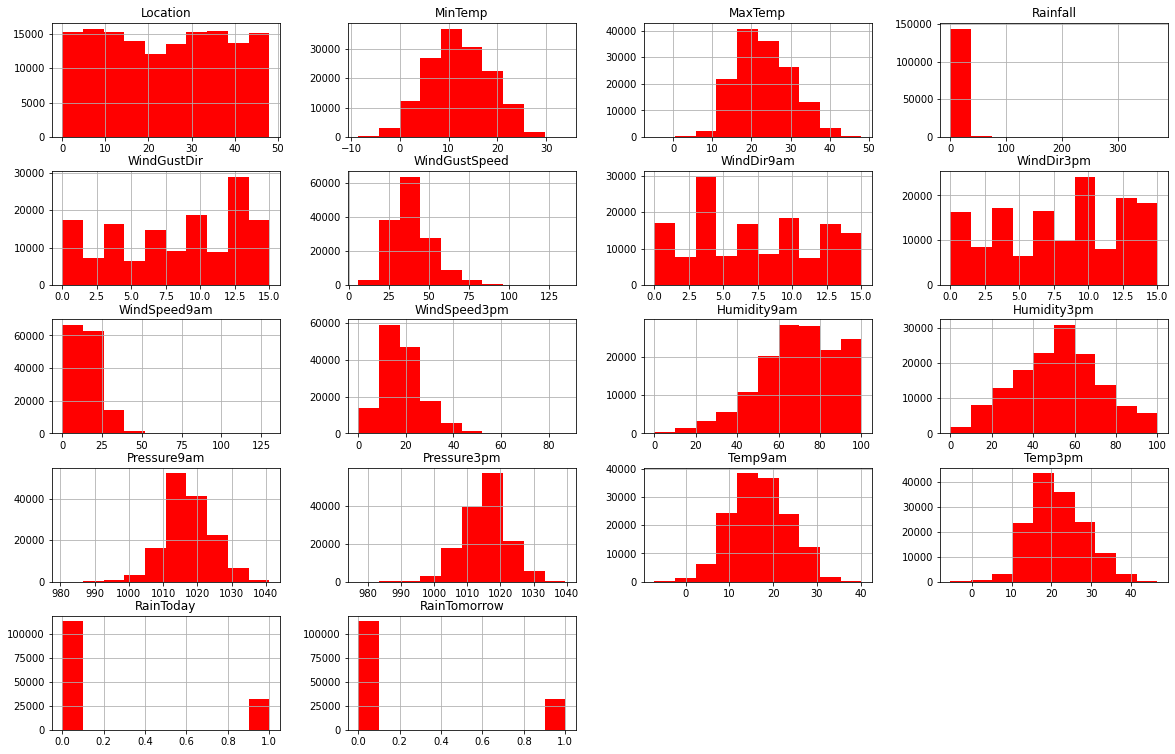

In [ ]:
# histogram
# this shows how the data is being distrubuted
aus_data.hist(bins=10, figsize=(20,13), color='Red')
plt.show()

Negative (0):  113299
positive (1):  31872


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


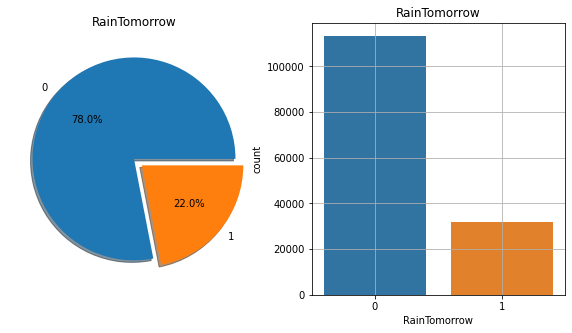

In [ ]:
# data visualization
# this is to check the percentage of the result tomorrow to know if the data set is balanced or not. we can see that the data set is imbalanced bcause the percentage of zero is more than the percentage of 1
# so we imbalance data
# count plot
f,ax=plt.subplots(1,2,figsize=(10,5))
aus_data['RainTomorrow'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('RainTomorrow')
ax[0].set_ylabel('')
sns.countplot('RainTomorrow',data=aus_data,ax=ax[1])
ax[1].set_title('RainTomorrow')
N,P = aus_data['RainTomorrow'].value_counts()
print('Negative (0): ',N)
print('positive (1): ',P)
plt.grid()
plt.show()

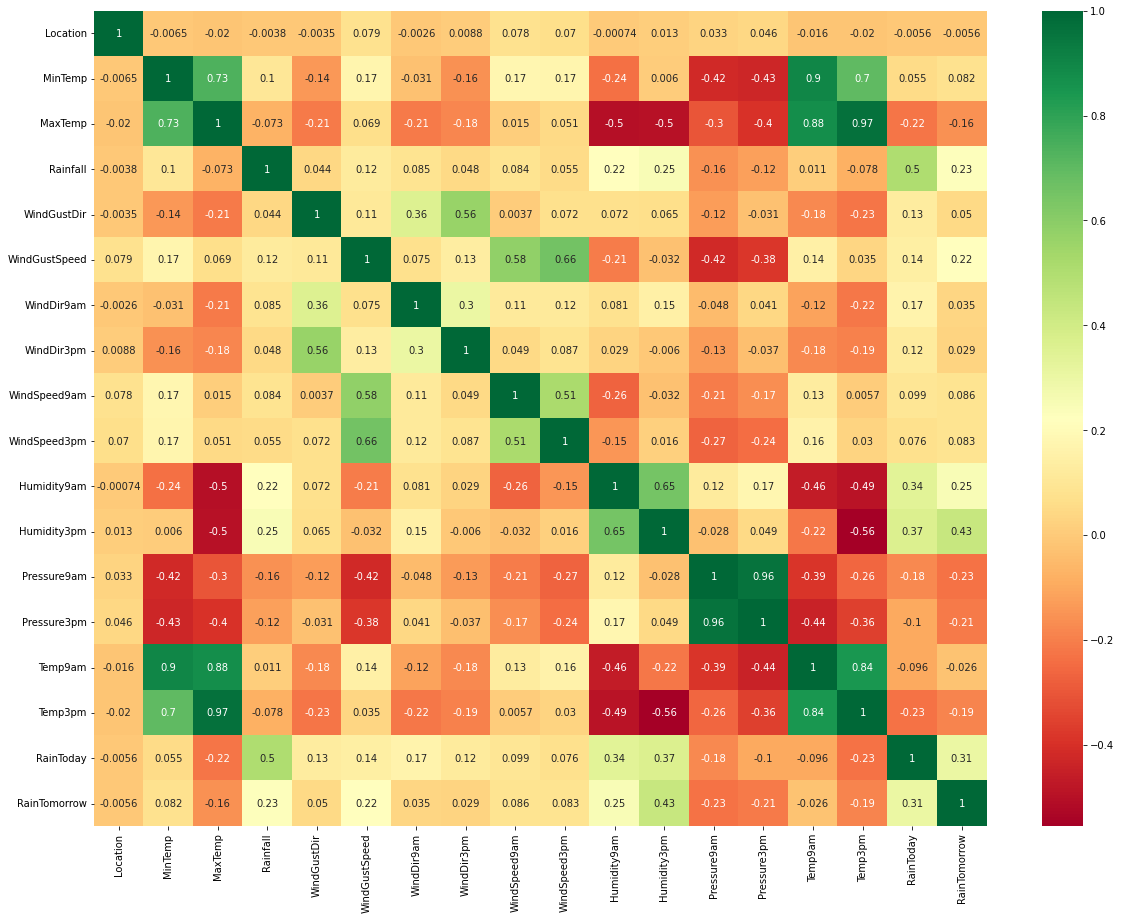

In [ ]:
import seaborn as sns
corrmat = aus_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
# plot heat map
g=sns.heatmap(aus_data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [ ]:
# it is import because when we are plotting our graph the data need to be in range. so the range has to be within +3 to -3
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
ssx = scaler.transform(x)
# ssx means standard scaler for x
ssx

array([[-1.53117119,  0.19077475, -0.0421791 , ..., -0.01405394,
         0.02260569, -0.53047076],
       [-1.53117119, -0.75070075,  0.2676807 , ...,  0.03241724,
         0.38695939, -0.53047076],
       [-1.53117119,  0.11231846,  0.35218792, ...,  0.6210521 ,
         0.22664376, -0.53047076],
       ...,
       [ 1.20850663, -1.06452592,  0.52120235, ..., -0.69563114,
         0.64929405, -0.53047076],
       [ 1.20850663, -0.68793572,  0.53528689, ..., -0.29288098,
         0.6347199 , -0.53047076],
       [ 1.20850663,  0.42614363, -0.45063065, ..., -0.30837137,
        -0.10856165, -0.53047076]])

In [ ]:
ssx.shape

(145171, 17)

In [ ]:
#VIF determines the strength of the correlation between the independent variables
# this is the score of an independent variable represent how well the variable is explained by other independent variables
# vif exceeding 5 or 10 indicates high multicollinearity between this independent variabler and the others
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']= [variance_inflation_factor(ssx,i) for i in range(ssx.shape[1])]
vif['Feautures']= x.columns

In [ ]:
vif

,vif,Feautures
0,1.017240,Location
1,7.823242,MinTemp
2,20.652424,MaxTemp
3,1.375546,Rainfall
4,1.614488,WindGustDir
5,2.439069,WindGustSpeed
6,1.275351,WindDir9am
7,1.605721,WindDir3pm
8,1.828633,WindSpeed9am
9,1.931957,WindSpeed3pm


In [ ]:
x.shape

(145171, 17)

In [ ]:
# im droping the varience influence factor that has number greater than 10
x1 = x.drop(['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'], axis=1)

In [ ]:
x1.shape

(145171, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1)
rescaledx = scaler.transform(x1)
# ssx means standard scaler for x
ssx

array([[-1.53117119,  0.19077475, -0.0421791 , ..., -0.01405394,
         0.02260569, -0.53047076],
       [-1.53117119, -0.75070075,  0.2676807 , ...,  0.03241724,
         0.38695939, -0.53047076],
       [-1.53117119,  0.11231846,  0.35218792, ...,  0.6210521 ,
         0.22664376, -0.53047076],
       ...,
       [ 1.20850663, -1.06452592,  0.52120235, ..., -0.69563114,
         0.64929405, -0.53047076],
       [ 1.20850663, -0.68793572,  0.53528689, ..., -0.29288098,
         0.6347199 , -0.53047076],
       [ 1.20850663,  0.42614363, -0.45063065, ..., -0.30837137,
        -0.10856165, -0.53047076]])

Negative (0):  113299
positive (1):  31872


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


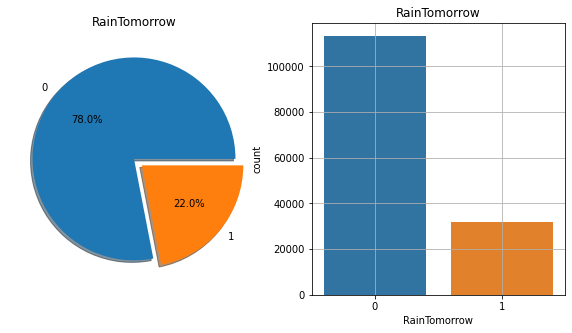

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
aus_data['RainTomorrow'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('RainTomorrow')
ax[0].set_ylabel('')
sns.countplot('RainTomorrow',data=aus_data,ax=ax[1])
ax[1].set_title('RainTomorrow')
N,P = aus_data['RainTomorrow'].value_counts()
print('Negative (0): ',N)
print('positive (1): ',P)
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


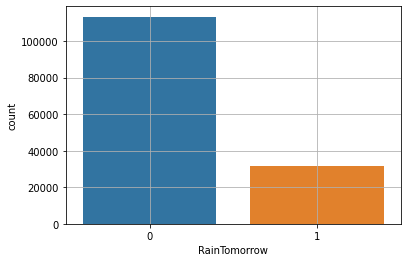

In [ ]:
sns.countplot(aus_data['RainTomorrow'])
plt.grid()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
x_res, y_res = oversample.fit_resample(rescaledx,y)

In [ ]:
x_res.shape, y_res.shape

((226598, 12), (226598,))

In [ ]:
y_res.value_counts()

0    113299
1    113299
Name: RainTomorrow, dtype: int64

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

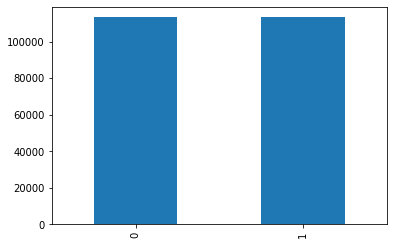

In [ ]:
pd.Series(y_res).value_counts().plot.bar()
plt.grid

In [ ]:
# next is train test split so that we can have 2 data set . one to train our model, then the next one is to test our model
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=0)
# i want 80 percent to be for my training of the data set and 20 percent for testing that is why i put tes size as 0.2

In [ ]:
x_train

array([[-1.10968229e+00,  1.85404814e+00,  8.63206822e+00, ...,
         1.12328090e+00,  1.87625337e+00,  1.88511804e+00],
       [-1.39067489e+00,  9.66271997e-02,  5.32154191e+00, ...,
         1.38295708e+00,  1.87625337e+00,  1.88511804e+00],
       [ 1.13825849e+00,  9.43955154e-01, -2.75391070e-01, ...,
        -3.30905704e-01, -2.02777933e+00, -5.30470761e-01],
       ...,
       [-4.77448950e-01,  1.09516056e-01, -2.38874091e-01, ...,
         5.24298912e-01,  1.04448302e+00, -5.30470761e-01],
       [ 1.62999553e+00,  9.28263896e-01, -2.75391070e-01, ...,
         4.48122835e-01,  1.43704969e+00, -5.30470761e-01],
       [ 1.13188192e+00,  1.67666501e+00,  3.02696280e-01, ...,
        -4.25347637e-01,  5.54651939e-03,  1.88511804e+00]])

In [ ]:
x_test

array([[ 0.36552884, -0.279963  ,  0.72491185, ...,  1.33102184,
         0.41224111,  1.88511804],
       [-1.32042674, -1.22658098,  0.34670719, ...,  1.48682755,
         2.22372276,  1.88511804],
       [-1.67166749, -0.82915705, -0.27539107, ..., -0.38284094,
         0.07063825, -0.53047076],
       ...,
       [ 0.15478439,  0.89688138,  1.12979636, ...,  0.81166949,
         1.29064846,  1.88511804],
       [ 0.22503254,  1.14794151, -0.27539107, ..., -0.9021933 ,
         0.16823907, -0.53047076],
       [ 0.50602514, -0.79777453, -0.27539107, ..., -0.64251712,
        -0.02696257, -0.53047076]])

In [ ]:
y_train

89166     1
4723      1
49288     0
68192     0
218397    1
         ..
176963    1
117952    0
173685    1
43567     0
199340    1
Name: RainTomorrow, Length: 181278, dtype: int64

In [ ]:
y_test

115944    0
175971    1
97466     0
37469     0
206737    1
         ..
209259    1
103361    0
19352     1
21027     0
121823    0
Name: RainTomorrow, Length: 45320, dtype: int64

In [ ]:
x_train.shape,y_train.shape

((181278, 12), (181278,))

In [ ]:
x_test.shape,y_test.shape

((45320, 12), (45320,))

In [ ]:
# this is a binary class classification, this is because the output result is only two outcome which is zero and one
# logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train,y_train)
lr_predictions = lr.predict(x_test)


In [ ]:
# train score and test score for logistic regression
from sklearn.metrics import accuracy_score
print('Train Accuracy of logistic regression ', lr.score(x_train,y_train)*100)
print('Accuracy score (test for x and y)  of logistic regression ', lr.score(x_test,y_test)*100)
print('Accuracy score (test for y and prediction)  of logistic regression ', accuracy_score(y_test,lr_predictions)*100)


Train Accuracy of logistic regression  75.88841447941836
Accuracy score (test for x and y)  of logistic regression  75.97308031774051
Accuracy score (test for y and prediction)  of logistic regression  75.97308031774051


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
#confusin matrix of logistic regression
cmlr=confusion_matrix(y_test,lr_predictions)
print('confusion matrix is',cmlr)
print(classification_report(y_test,lr_predictions))

confusion matrix is [[17534  5063]
 [ 5826 16897]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     22597
           1       0.77      0.74      0.76     22723

    accuracy                           0.76     45320
   macro avg       0.76      0.76      0.76     45320
weighted avg       0.76      0.76      0.76     45320



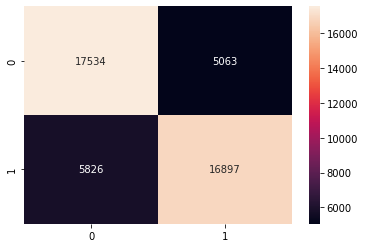

In [ ]:
sns.heatmap(confusion_matrix(y_test,lr_predictions),annot=True,fmt='d')
# this is the confusion matrix graphically

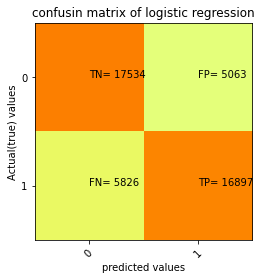

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cmlr, interpolation='nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('confusin matrix of logistic regression')
plt.ylabel('Actual(true) values')
plt.xlabel('predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+ '= '+str(cmlr[i][j]))
plt.show()

In [ ]:
# naive-bayes classifier
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_test)



In [ ]:
# train score and test score for naivie bayes

print('Train Accuracy of naivie bayes ', nb.score(x_train,y_train)*100)
print('Accuracy score (test for x and y) of naivie bayes  ', nb.score(x_test,y_test)*100)
print('Accuracy score (test for y and prediction)  of naivie bayes  ', accuracy_score(y_test,nb_predictions)*100)


Train Accuracy of naivie bayes  71.03840510155672
Accuracy score (test for x and y) of naivie bayes   71.05913503971757
Accuracy score (test for y and prediction)  of naivie bayes   71.05913503971757


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
#confusin matrix of naivie bayes
cmnb=confusion_matrix(y_test,nb_predictions)
print('confusion matrix is',cmnb)
print(classification_report(y_test,nb_predictions))

confusion matrix is [[18903  3694]
 [ 9422 13301]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.74     22597
           1       0.78      0.59      0.67     22723

    accuracy                           0.71     45320
   macro avg       0.73      0.71      0.71     45320
weighted avg       0.73      0.71      0.71     45320



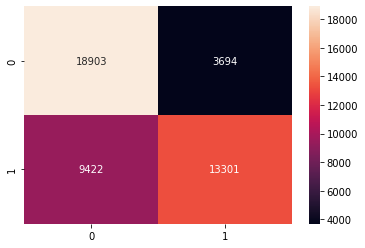

In [ ]:
sns.heatmap(confusion_matrix(y_test,nb_predictions),annot=True,fmt='d')
# this is the confusion matrix graphically

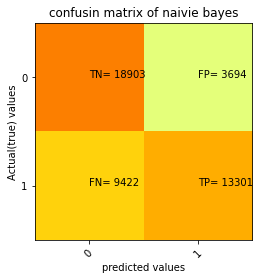

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cmnb, interpolation='nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('confusin matrix of naivie bayes')
plt.ylabel('Actual(true) values')
plt.xlabel('predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+ '= '+str(cmnb[i][j]))
plt.show()

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
#prediction
rf_predictions = rf.predict(x_test)

In [ ]:
# train score and test score for RandomForest

print('Train Accuracy of random forest ', rf.score(x_train,y_train)*100)
print('Accuracy score (test for x and y) of random forest  ', rf.score(x_test,y_test)*100)
print('Accuracy score (test for y and prediction)  of random forest  ', accuracy_score(y_test,rf_predictions)*100)



Train Accuracy of random forest  99.97021149836162
Accuracy score (test for x and y) of random forest   90.50750220653133
Accuracy score (test for y and prediction)  of random forest   90.50750220653133


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
#confusin matrix of randomforest
cmrf=confusion_matrix(y_test,rf_predictions)
print('confusion matrix is',cmrf)
print(classification_report(y_test,rf_predictions))

confusion matrix is [[20641  1956]
 [ 2346 20377]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     22597
           1       0.91      0.90      0.90     22723

    accuracy                           0.91     45320
   macro avg       0.91      0.91      0.91     45320
weighted avg       0.91      0.91      0.91     45320



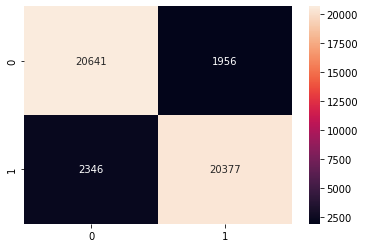

In [ ]:
sns.heatmap(confusion_matrix(y_test,rf_predictions),annot=True,fmt='d')
# this is the confusion matrix graphically

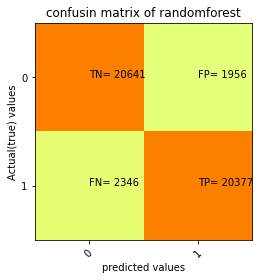

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cmrf, interpolation='nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('confusin matrix of randomforest')
plt.ylabel('Actual(true) values')
plt.xlabel('predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+ '= '+str(cmrf[i][j]))
plt.show()

In [ ]:
# kneighborsclassifier(KNN)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
# knn prediction
knn_predictions = knn.predict(x_test)

In [ ]:
# train score and test score for knn

print('Train Accuracy of KNN ', knn.score(x_train,y_train)*100)
print('Accuracy (test) score of KNN  ', knn.score(x_test,y_test)*100)
print('Accuracy (test) score of svm  ', accuracy_score(y_test,knn_predictions)*100)


Train Accuracy of KNN  89.65125387526341
Accuracy (test) score of KNN   85.16548984995586
Accuracy (test) score of svm   85.16548984995586


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
#confusin matrix of kneighborsclassifier(KNN)
cmknn=confusion_matrix(y_test,knn_predictions)
print('confusion matrix is',cmknn)
print(classification_report(y_test,knn_predictions))

confusion matrix is [[17017  5580]
 [ 1143 21580]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     22597
           1       0.79      0.95      0.87     22723

    accuracy                           0.85     45320
   macro avg       0.87      0.85      0.85     45320
weighted avg       0.87      0.85      0.85     45320



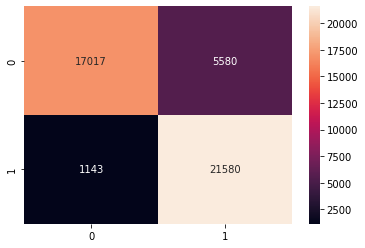

In [ ]:
sns.heatmap(confusion_matrix(y_test,knn_predictions),annot=True,fmt='d')
# this is the confusion matrix graphically

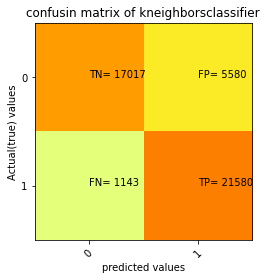

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cmknn, interpolation='nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('confusin matrix of kneighborsclassifier')
plt.ylabel('Actual(true) values')
plt.xlabel('predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+ '= '+str(cmknn[i][j]))
plt.show()

In [ ]:
rf_predictions= le1.inverse_transform(rf_predictions)
y_test=le1.inverse_transform(y_test)

print(rf_predictions)
print(y_test)

['No' 'Yes' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [ ]:
y_test = y_test.reshape(-1,1)
rf_predictions = rf_predictions.reshape(-1,1)

In [ ]:
data = np.concatenate((y_test,rf_predictions),axis=1)
dataset= pd.DataFrame(data,columns=['auctual RainTomorrow','Prediction of RainTomorrow'])

In [ ]:
dataset

,auctual RainTomorrow,Prediction of RainTomorrow
0,No,No
1,Yes,Yes
2,No,No
3,No,No
4,Yes,Yes
...,...,...
45315,Yes,Yes
45316,No,No
45317,Yes,No
45318,No,No


In [ ]:
dataset['auctual RainTomorrow'].value_counts()


Yes    22723
No     22597
Name: auctual RainTomorrow, dtype: int64

In [ ]:
dataset['Prediction of RainTomorrow'].value_counts()


No     22987
Yes    22333
Name: Prediction of RainTomorrow, dtype: int64